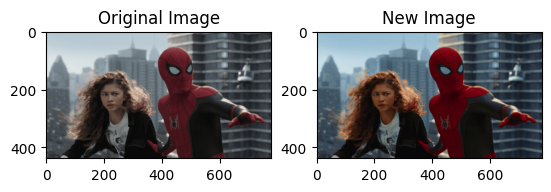

In [109]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt


img=cv.imread('spider.png',cv.IMREAD_COLOR)  #read the image
img1=cv.cvtColor(img,cv.COLOR_BGR2RGB)  #BGR TO RGB conversion
imgc=cv.cvtColor(img,cv.COLOR_BGR2HSV) #convert to HSV plane
(H,S,V)=cv.split(imgc) #split the HSV plane

#intensity transformation function
def f(x,a,sigma=70):
    value=int(min(x+a*128*np.exp(-((x-128)**2)/(2*sigma**2)),255))
    return value

table=np.array([f(i,0.75) for i in np.arange(0,256)]).astype('uint8')
#sat=cv.LUT(S,table)  #using lookup table

for i in np.arange(0,len(S)):
    for j in np.arange(0,len(S[i])):
        S[i][j]=f(S[i][j],0.75)
HSV=cv.merge([H,S,V]) #merge the H,S,V planes
#HSV=cv.merge([H,sat,V])  #when LUT is used


img_hsv=cv.cvtColor(HSV,cv.COLOR_HSV2RGB) #convert to RGB color plane
fig,ax=plt.subplots(1,2)
ax[0].imshow(img1)
ax[0].set_title('Original Image')
ax[1].imshow(img_hsv)
ax[1].set_title('New Image')
cv.imwrite('Converted.jpg',img_hsv)  #writing the converted image
plt.savefig('Original and corrected')
    

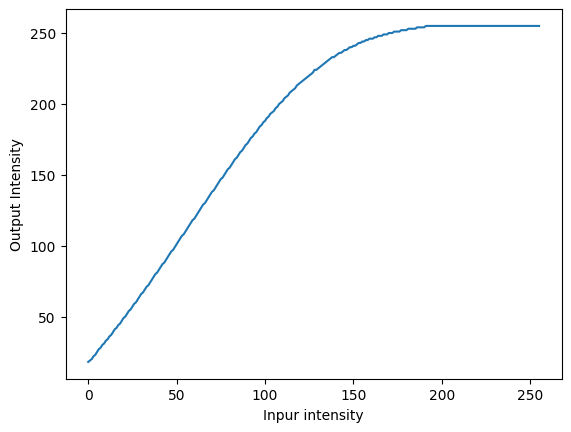

In [105]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

#intensity transformation function
def f(x,a,sigma=70):
    value=int(min(x+a*128*np.exp(-((x-128)**2)/(2*sigma**2)),255))
    return value

table=np.array([f(i,0.75) for i in np.arange(0,256)]).astype('uint8')
plt.plot(table)
plt.xlabel('Inpur intensity')
plt.ylabel('Output Intensity')
plt.savefig('Intensity Transformation')
plt.show()

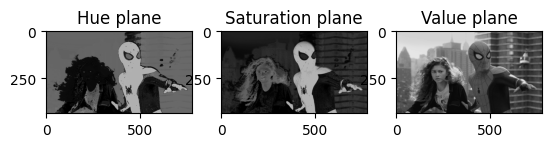

In [108]:
import numpy as np 
import matplotlib.pyplot as plt


img=cv.imread('spider.png',cv.IMREAD_COLOR)  #read the image
img1=cv.cvtColor(img,cv.COLOR_BGR2RGB)  #BGR TO RGB conversion
imgc=cv.cvtColor(img,cv.COLOR_BGR2HSV)#convert to HSV plane
(H,S,V)=cv.split(imgc) #split the HSV plane

fig,ax=plt.subplots(1,3)
ax[0].imshow(H,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Hue plane')
ax[1].imshow(S,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Saturation plane')
ax[2].imshow(V,cmap='gray',vmin=0,vmax=255)
ax[2].set_title('Value plane')
plt.savefig('Three planes')
plt.show()